In [1]:
# enable autoreload
%load_ext autoreload
%autoreload 2

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mephisto import Mephistogram, like

# 1D

## addition

(<Figure size 500x400 with 1 Axes>, <AxesSubplot:xlabel='the-axis'>)

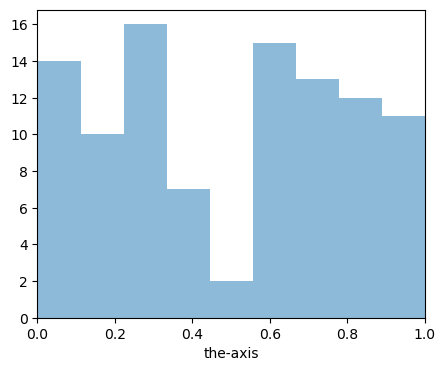

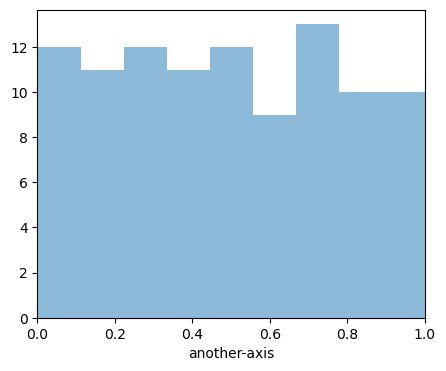

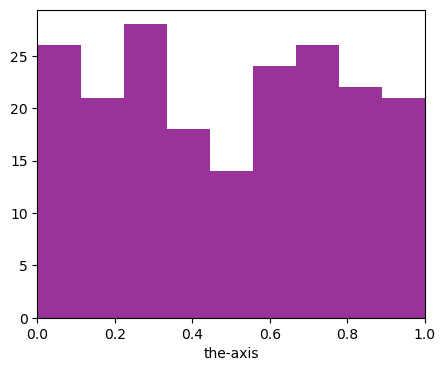

In [3]:
bins = np.linspace(0, 1, num=10)

nums = np.random.uniform(size=100)
h, xb = np.histogram(nums, bins=bins)
# give hist and bins directly to Mephistogram
m1 = Mephistogram(h, bins, axis_names="the-axis", make_hist=False)
m1.plot(alpha=0.5)

nums = np.random.uniform(size=100)
# use internal method to build the histogram
m2 = Mephistogram(nums, bins, axis_names="another-axis", make_hist=True)
m2.plot(alpha=0.5)

(m1+m2).plot(color="purple", alpha=0.8)

In [4]:
print(m1)

Mephistogram with 1 dimensions and shape (9,). Axis names are the-axis.
[14 10 16  7  2 15 13 12 11]


# 2D

## addition


Mephistogram with 2 dimensions and shape (9, 6). Axis names are ('x-axis', 'y-axis').
[[5. 4. 5. 2. 6. 5.]
 [3. 3. 5. 0. 2. 5.]
 [4. 2. 5. 4. 4. 7.]
 [0. 7. 4. 2. 6. 1.]
 [3. 4. 2. 7. 2. 6.]
 [6. 1. 6. 4. 3. 3.]
 [3. 2. 4. 3. 5. 1.]
 [4. 2. 5. 3. 2. 3.]
 [3. 6. 5. 3. 5. 3.]]


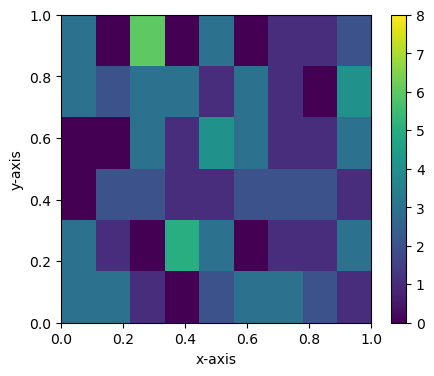

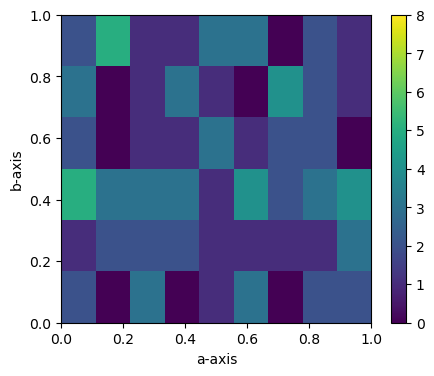

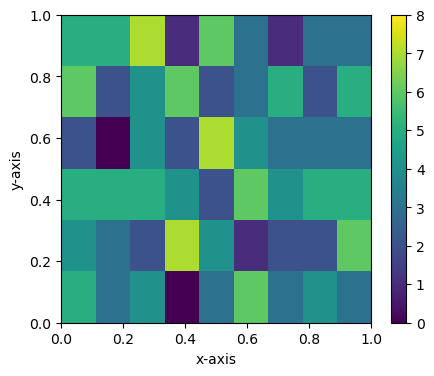

In [5]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))

nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

nums = np.random.uniform(size=(2, 100))
mh2 = Mephistogram(nums, bins, ("a-axis", "b-axis"), make_hist=True)
mh3 = mh1 + mh2

print(mh3)

mh1.plot(vmin=0, vmax=8)
plt.colorbar()
mh2.plot(vmin=0, vmax=8)
plt.colorbar()
mh3.plot(vmin=0, vmax=8)
plt.colorbar()

## matmul


Mephistogram with 2 dimensions and shape (9, 11). Axis names are ('x-axis', 'b-axis').
[[15. 21. 18. 17. 16. 14. 35. 21. 26. 18. 24.]
 [24. 24.  6.  8.  6. 12.  6. 24. 42.  6. 26.]
 [17. 29. 13.  4. 10. 14. 22. 18. 26. 16. 23.]
 [11. 12.  8.  9. 10.  9. 18. 12. 19. 12. 12.]
 [16. 25. 13.  7. 12. 15. 23. 18. 24. 18. 20.]
 [22. 27. 10. 11. 11. 15.  9. 24. 38. 15. 32.]
 [12. 17. 13. 10. 10. 12. 24. 17. 18. 12. 15.]
 [11. 14.  7.  6.  5. 10.  6. 15. 16.  7. 14.]
 [25. 28.  9. 11. 14. 14. 17. 22. 46. 18. 31.]]


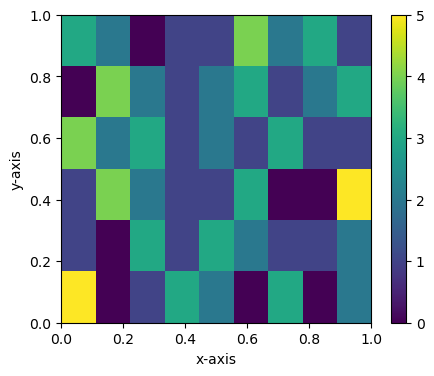

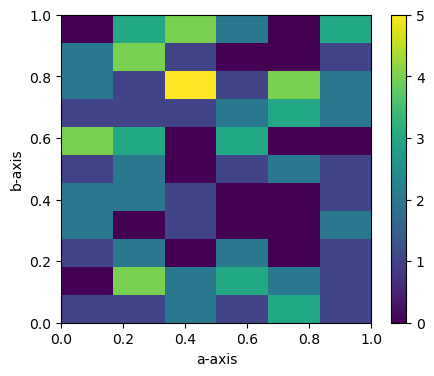

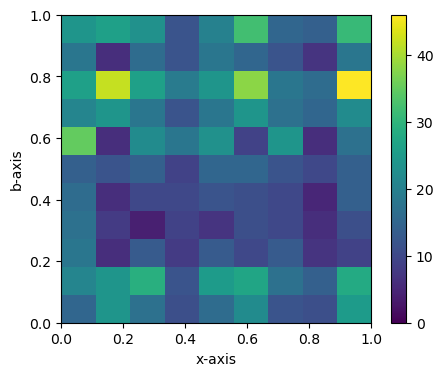

In [6]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))
nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

bins = (np.linspace(0, 1, num=7), np.linspace(0, 1, num=12))
nums = np.random.uniform(size=(2, 100))
h2, xb, yb = np.histogram2d(*nums, bins=bins)
mh2 = Mephistogram(h2, bins, ("a-axis", "b-axis"))
mh3 = mh1 @ mh2

print(mh3)

mh1.plot(vmin=0)
plt.colorbar()
mh2.plot(vmin=0)
plt.colorbar()
mh3.plot(vmin=0)
plt.colorbar()

## Transpose

Mephistogram with 2 dimensions and shape (9, 6). Axis names are ('x-axis', 'y-axis').
[[5. 1. 1. 4. 0. 3.]
 [0. 0. 4. 2. 4. 2.]
 [1. 3. 2. 3. 2. 0.]
 [3. 1. 1. 1. 1. 1.]
 [2. 3. 1. 2. 2. 1.]
 [0. 2. 3. 1. 3. 4.]
 [3. 1. 0. 3. 1. 2.]
 [0. 1. 0. 1. 2. 3.]
 [2. 2. 5. 1. 3. 1.]] Mephistogram with 2 dimensions and shape (6, 9). Axis names are ('y-axis', 'x-axis').
[[5. 0. 1. 3. 2. 0. 3. 0. 2.]
 [1. 0. 3. 1. 3. 2. 1. 1. 2.]
 [1. 4. 2. 1. 1. 3. 0. 0. 5.]
 [4. 2. 3. 1. 2. 1. 3. 1. 1.]
 [0. 4. 2. 1. 2. 3. 1. 2. 3.]
 [3. 2. 0. 1. 1. 4. 2. 3. 1.]]


(<Figure size 500x400 with 1 Axes>,
 <AxesSubplot:xlabel='y-axis', ylabel='x-axis'>)

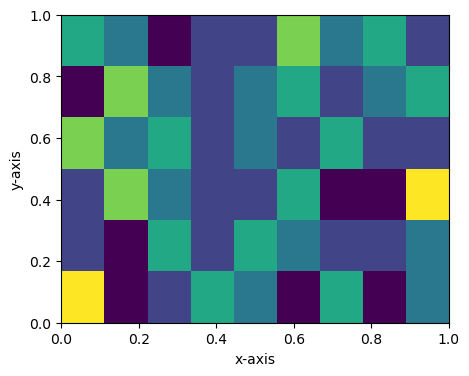

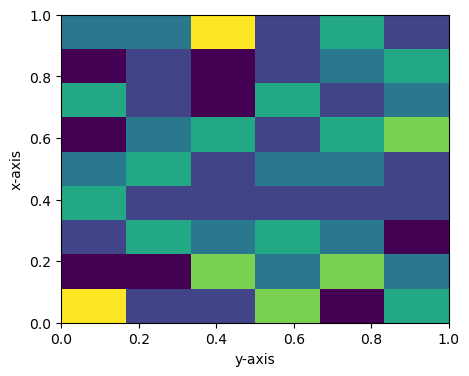

In [7]:
mhT = mh1.T()
print(mh1, mhT)

mh1.plot()
mhT.plot()

# other functionality

In [8]:
# dont raise error, just check
m1.match(mh2, verbose=False, raise_err=False)
# dont raise error, but print message
m1.match(mh2, verbose=True, raise_err=False)

Elementary arithmetic not possible. Shapes are (9,) and (6, 11);


False

In [9]:
# raise error
m1.match(mh2, raise_err=True)

ValueError: Elementary arithmetic not possible. Shapes are (9,) and (6, 11);

In [10]:
# raise error
m1 + mh2

ValueError: Elementary arithmetic not possible. Shapes are (9,) and (6, 11);

In [11]:
# example math operations
mh = Mephistogram(
    np.random.uniform(size=100), bins=np.linspace(0, 1, num=11), make_hist=True
)

print(mh)
print(-mh)
print(mh - 2)
print(2 - mh)
print(mh / 2)
print(15 / mh)

Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[11  6  7  9 10 14 15 14 10  4]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[-11  -6  -7  -9 -10 -14 -15 -14 -10  -4]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ 9  4  5  7  8 12 13 12  8  2]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ -9  -4  -5  -7  -8 -12 -13 -12  -8  -2]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[5.5 3.  3.5 4.5 5.  7.  7.5 7.  5.  2. ]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[1.36363636 2.5        2.14285714 1.66666667 1.5        1.07142857
 1.         1.07142857 1.5        3.75      ]


In [12]:
# example comparisons
mh1 = Mephistogram(
    np.random.uniform(-1, 1, 10), bins=np.linspace(0, 1, num=11), make_hist=False
)
#like(mh1) builds a mephistogram like mh1, filled with given values (default is 0)
mh2 = like(mh1) + Mephistogram(
    np.random.uniform(-1, 1, 10), bins=np.linspace(0, 1, num=11), make_hist=False
)

print(mh1>mh2)


[False False False  True  True False False  True  True False]
